In [1]:
import numpy as np

In [2]:
#we will implement cosine similarity 

In [52]:
text = ["London Paris London", "Paris Paris London"]

# come up with something like this -> [[2,1],[1,2]] (counts the number of times London and Paris appears in each of the element in the text list)

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_fit = cv.fit_transform(text)

print(cv.get_feature_names())
returnArray = cv_fit.toarray()

['london', 'paris']


In [53]:
returnArray[1]

array([1, 2])

In [7]:
import matplotlib.pyplot as plt

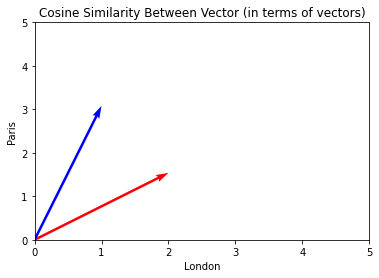

In [43]:
V = returnArray
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], scale=5)
plt.xlim(0,5)
plt.ylim(0,5)
plt.title("Cosine Similarity Between Vector (in terms of vectors)")
plt.xlabel("London")
plt.ylabel("Paris")
plt.show()

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(returnArray)

In [30]:
print(similarity_scores)

#similarity matrix is printed below

[[1.  0.8]
 [0.8 1. ]]


In [31]:
#first text is similar to first text 100%. First text is similar to second text 80%. Same thing does with the second row.

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("movie_dataset.csv")

In [5]:
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [6]:
featuresList = ["keywords", "cast","genres", "director"]

In [9]:
def combine_features(row):
    return row['keywords'] + " " + row['cast'] + " " + row['genres'] + " " + row['director']

In [13]:
for feature in featuresList:
    df[feature] = df[feature].fillna(" ")

In [14]:
df["combined_features_row"] = df.apply(combine_features,axis = 1)

In [15]:
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features_row
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,culture clash future space war space colony so...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,ocean drug abuse exotic island east india trad...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spy based on novel secret agent sequel mi6 Dan...
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,dc comics crime fighter terrorist secret ident...
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,based on novel mars medallion space travel pri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez,united states\u2013mexico barrier legs arms pa...
4799,4799,9000,Comedy Romance,,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns,Edward Burns Kerry Bish\u00e9 Marsha Dietlei...
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,,"Signed, 

In [17]:
df.iloc[0].combined_features_row

'culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez Action Adventure Fantasy Science Fiction James Cameron'

In [18]:
cv = CountVectorizer()

In [23]:
count_matrix = cv.fit_transform(df["combined_features_row"])

In [24]:
print(cv.get_feature_names())

['11', '15th', '17th', '18th', '1910s', '1917', '1920s', '1930s', '1950s', '1960s', '1970s', '1980s', '1990s', '1992', '1995', '19th', '2001', '2002', '3d', '40', '50', '51', '60s', '66', 'aaliyah', 'aamir', 'aaran', 'aarniokoski', 'aaron', 'aasheekaa', 'aasif', 'abai', 'abandoned', 'abascal', 'abbas', 'abbass', 'abbey', 'abbie', 'abbott', 'abdalla', 'abdoo', 'abduction', 'abdul', 'abdulayev', 'abdullah', 'abe', 'abel', 'abell', 'abercrombie', 'abernathy', 'abhinay', 'abhishek', 'abi', 'abigail', 'abiteboul', 'abkarian', 'able', 'abo', 'abraham', 'abrahams', 'abrahamson', 'abrams', 'abramsohn', 'abroad', 'abu', 'abuse', 'abusive', 'academy', 'accent', 'accepting', 'accident', 'accidental', 'accountant', 'accusal', 'accusations', 'accused', 'ace', 'acharya', 'achrekar', 'acinapura', 'acker', 'ackland', 'ackles', 'ackman', 'acovone', 'acres', 'action', 'activism', 'activist', 'actor', 'actors', 'actress', 'ad', 'ada', 'adam', 'adams', 'adamson', 'adaptation', 'adar', 'addict', 'addicted'

In [25]:
cosineSimilarity = cosine_similarity(count_matrix)

In [27]:
cosineSimilarity

array([[1.        , 0.10540926, 0.12038585, ..., 0.        , 0.        ,
        0.        ],
       [0.10540926, 1.        , 0.0761387 , ..., 0.03651484, 0.        ,
        0.        ],
       [0.12038585, 0.0761387 , 1.        , ..., 0.        , 0.11145564,
        0.        ],
       ...,
       [0.        , 0.03651484, 0.        , ..., 1.        , 0.        ,
        0.04264014],
       [0.        , 0.        , 0.11145564, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04264014, 0.        ,
        1.        ]])

In [28]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [50]:
movie_liked_by_user = "Avatar"
indexOfLikedMovie = get_index_from_title(movie_liked_by_user)
cosineSimilarity[indexOfLikedMovie]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [41]:
similar_movies = list(enumerate(cosineSimilarity[indexOfLikedMovie]))

In [42]:
similar_movies

[(0, 1.0000000000000004),
 (1, 0.10540925533894599),
 (2, 0.12038585308576921),
 (3, 0.03774256780481986),
 (4, 0.23094010767585033),
 (5, 0.1924500897298753),
 (6, 0.0),
 (7, 0.1405456737852613),
 (8, 0.08206099398622181),
 (9, 0.11785113019775793),
 (10, 0.23094010767585035),
 (11, 0.07698003589195011),
 (12, 0.12038585308576921),
 (13, 0.11547005383792516),
 (14, 0.181848241863327),
 (15, 0.07548513560963972),
 (16, 0.1382602259640567),
 (17, 0.12309149097933272),
 (18, 0.1405456737852613),
 (19, 0.12309149097933272),
 (20, 0.11785113019775793),
 (21, 0.07856742013183862),
 (22, 0.08830215713766958),
 (23, 0.12909944487358055),
 (24, 0.06804138174397717),
 (25, 0.08606629658238704),
 (26, 0.21821789023599236),
 (27, 0.15713484026367724),
 (28, 0.15713484026367724),
 (29, 0.12309149097933272),
 (30, 0.1887128390240993),
 (31, 0.1924500897298753),
 (32, 0.10910894511799618),
 (33, 0.14547859349066158),
 (34, 0.0),
 (35, 0.16798421022632323),
 (36, 0.15713484026367724),
 (37, 0.2151657

In [43]:
sorted_similar_movies = sorted(similar_movies, key = lambda x:x[1], reverse = True)

In [49]:
print("The top 5 movies similar to " + movie_liked_by_user + " are: ")
i = 1
while (i < 6):
    print(str(i) + ". " + get_title_from_index(sorted_similar_movies[i][0]))
    i += 1

The top 5 movies similar to Avatar are: 
1. Guardians of the Galaxy
2. Aliens
3. Star Wars: Clone Wars: Volume 1
4. Star Trek Into Darkness
5. Star Trek Beyond
